## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
data = pd.read_csv('Advanced_IoT_Dataset.csv')

## Basic Information

In [19]:
data.head(10)

,Random,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG),Class
0,0,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,0
1,0,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,0
2,1,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,0
3,0,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,0
4,2,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,0
5,2,36.287722,45.598585,1.353790,981.460993,3.998621,16.991603,0.760842,31.403639,17.324861,2.745382,0.435148,27.927017,0
6,0,34.498869,54.556247,1.165056,1284.237645,4.992955,16.267282,1.692835,18.414688,19.715916,2.947532,0.218530,57.627219,0
7,1,33.105558,67.073406,1.097444,1009.239638,4.991835,15.965588,1.189576,19.407307,20.838177,2.847526,0.216855,41.304762,0
8,1,33.092448,67.061659,1.103098,1009.218887,4.995131,15.964761,1.182838,19.387573,20.824335,2.857965,0.209869,41.318049,0
9,0,34.483695,54.571127,1.178899,1284.224034,4.982078,16.273884,1.702040,18.414643,19.745347,2.968609,0.201824,57.638756,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Random                                                   30000 non-null  object 
 1    Average  of chlorophyll in the plant (ACHP)             30000 non-null  float64
 2    Plant height rate (PHR)                                 30000 non-null  float64
 3   Average wet weight of the growth vegetative (AWWGV)      30000 non-null  float64
 4   Average leaf area of the plant (ALAP)                    30000 non-null  float64
 5   Average number of plant leaves (ANPL)                    30000 non-null  float64
 6   Average root diameter (ARD)                              30000 non-null  float64
 7    Average dry weight of the root (ADWR)                   30000 non-null  float64
 8    Percentage of dry matter 

In [5]:
data.describe()

,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.060575,59.020331,1.247257,1063.639833,3.944789,16.285792,1.000981,22.674553,18.071061,2.907011,0.292094,34.922184
std,4.441682,11.985213,0.245989,260.712823,0.702537,2.882793,0.456292,9.571091,2.932830,1.361928,0.151516,7.998132
min,32.664004,37.020398,0.848351,658.488225,2.959173,11.075737,0.241972,8.021505,12.359924,1.126715,0.038210,23.632527
25%,34.399604,51.059436,1.064865,875.501356,3.013099,13.933350,0.675892,14.980983,15.600294,1.911408,0.185512,28.650713
50%,36.575753,55.912058,1.211328,1009.249081,3.998577,16.248496,0.833799,21.954006,18.477019,2.818611,0.246454,33.372665
75%,42.300836,67.069465,1.501692,1243.866525,4.015829,18.202577,1.313504,27.711471,20.365252,3.254133,0.407858,39.137224
max,46.431668,77.040610,1.775383,1751.031654,5.037358,23.325870,2.196556,43.660373,23.253049,6.908923,0.687470,57.672004


In [6]:
data.isnull().sum()

Random                                                     0
 Average  of chlorophyll in the plant (ACHP)               0
 Plant height rate (PHR)                                   0
Average wet weight of the growth vegetative (AWWGV)        0
Average leaf area of the plant (ALAP)                      0
Average number of plant leaves (ANPL)                      0
Average root diameter (ARD)                                0
 Average dry weight of the root (ADWR)                     0
 Percentage of dry matter for vegetative growth (PDMVG)    0
Average root length (ARL)                                  0
Average wet weight of the root (AWWR)                      0
 Average dry weight of vegetative plants (ADWV)            0
Percentage of dry matter for root growth (PDMRG)           0
Class                                                      0
dtype: int64

## Distribution of each feature

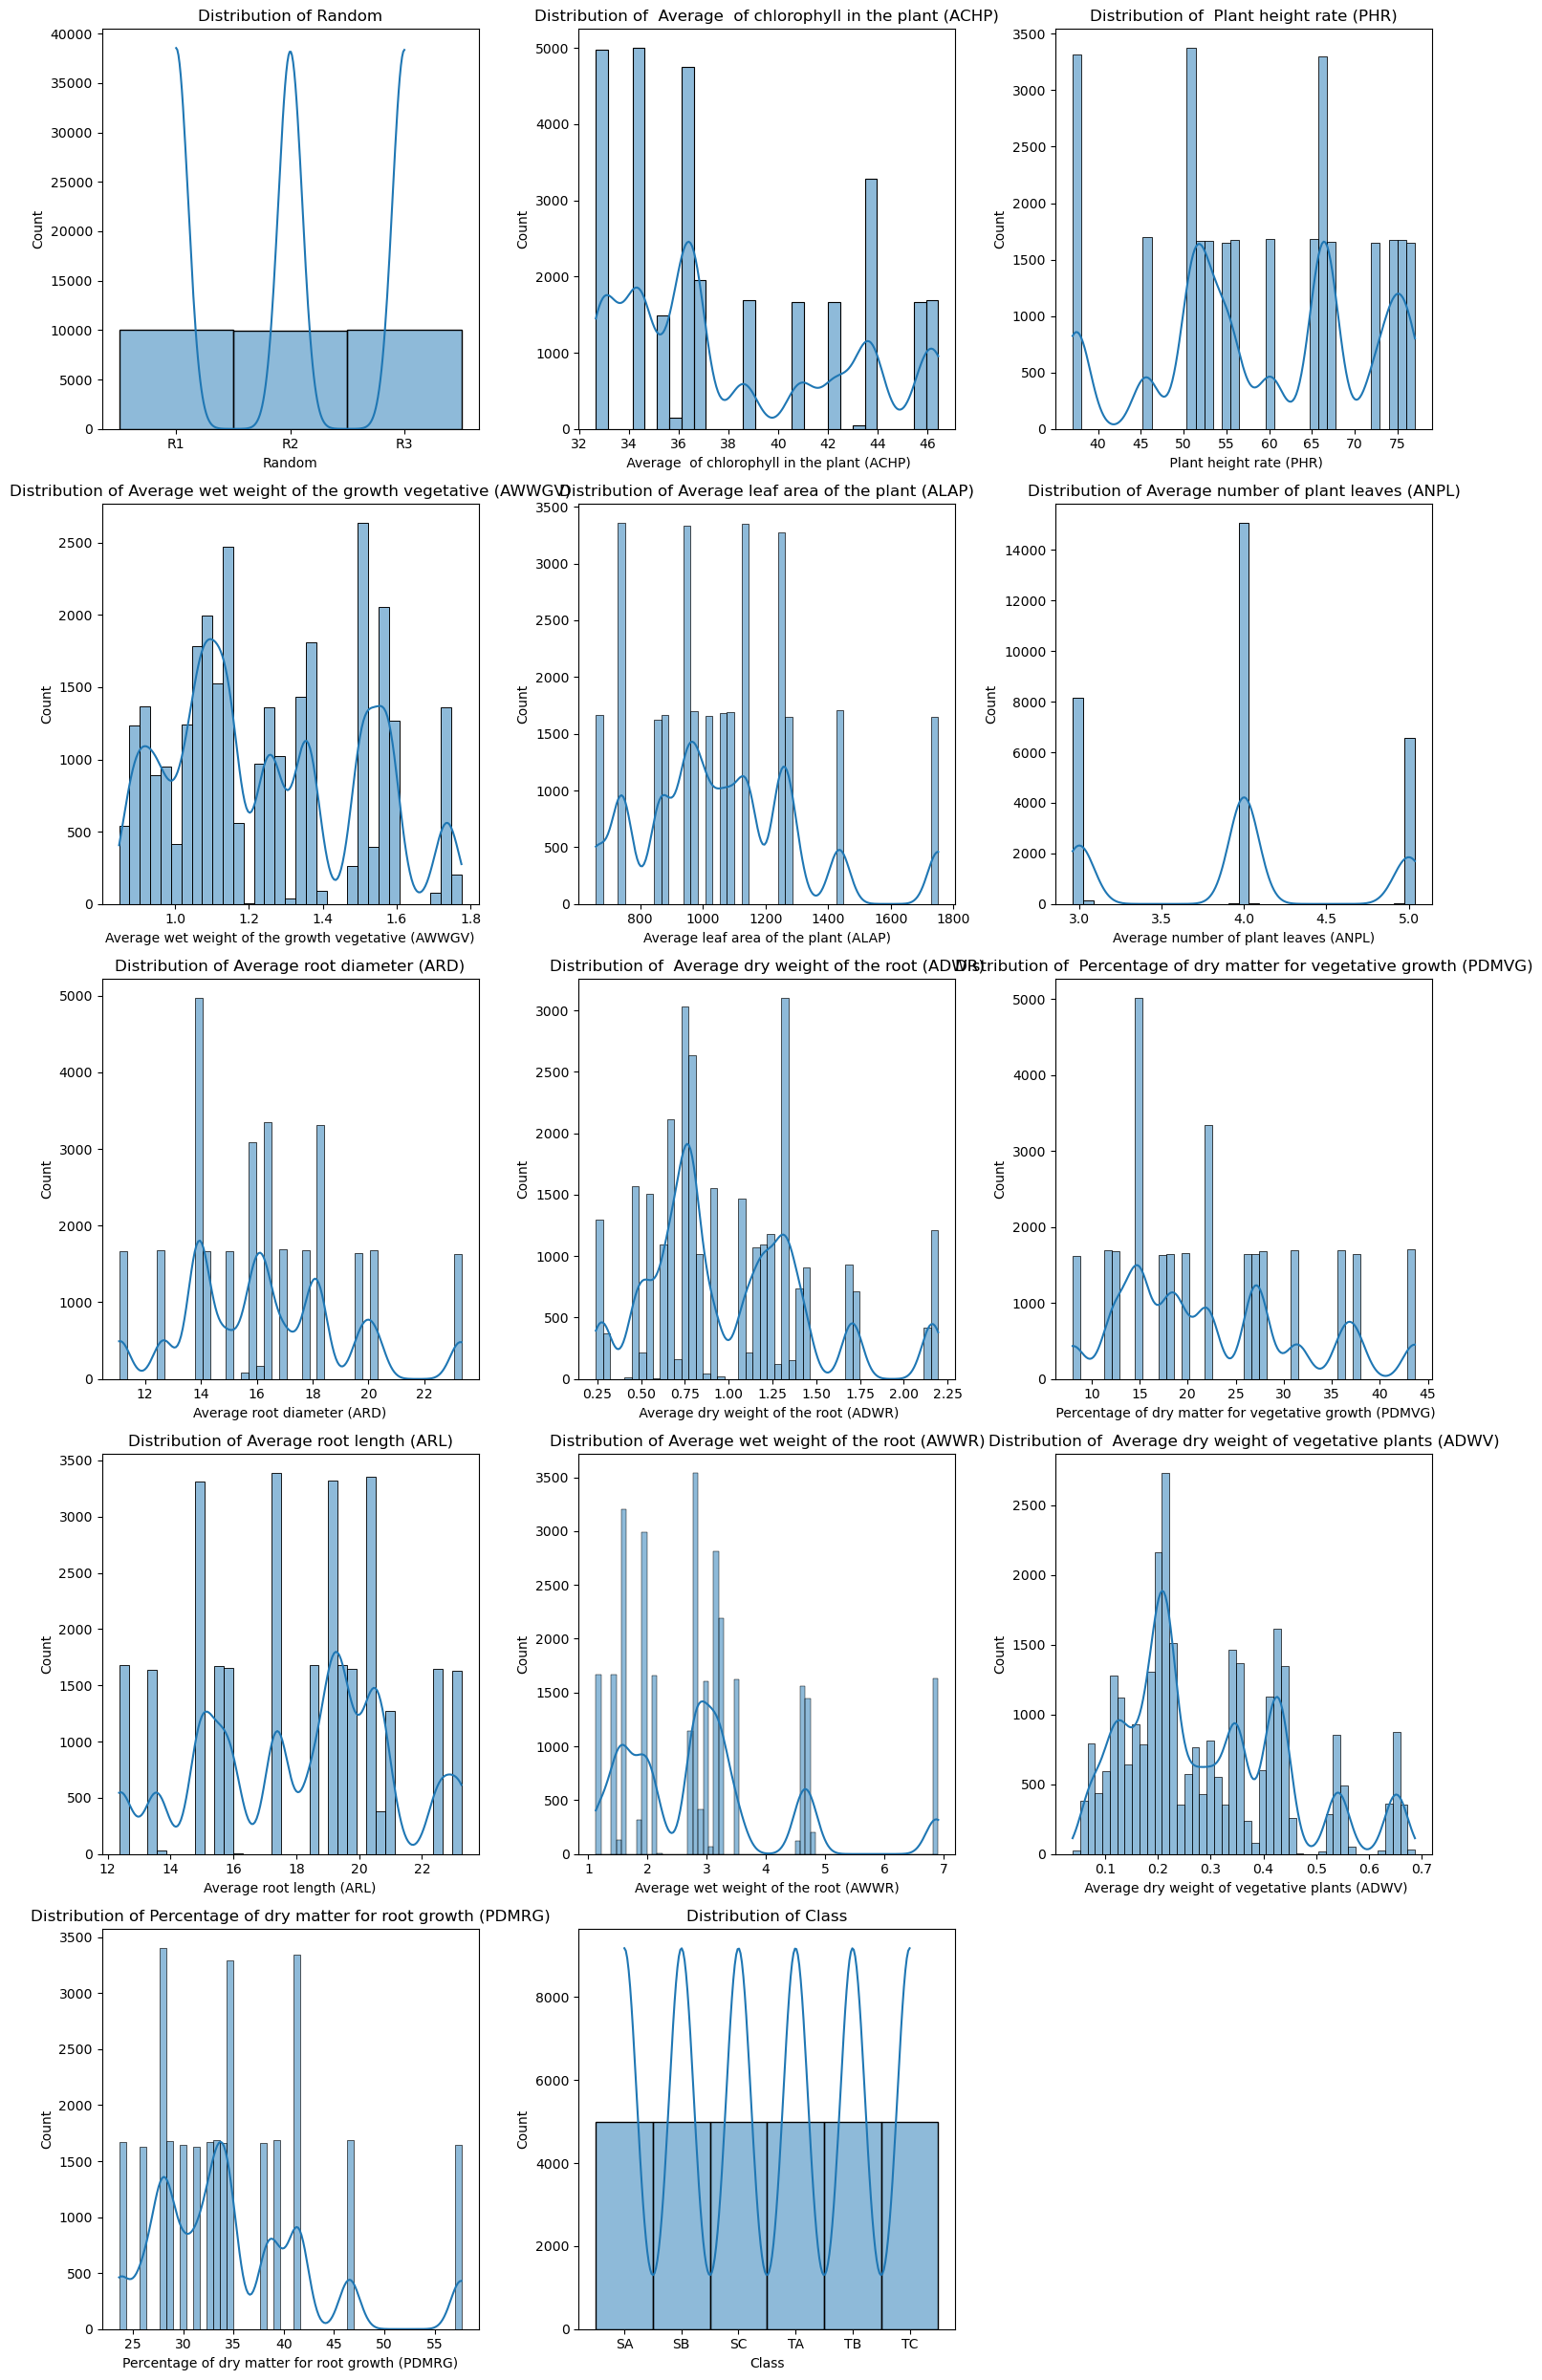

In [7]:
num_columns = len(data.columns)

ncols = 3
nrows = (num_columns + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

for i, column in enumerate(data.columns):
    row = i // ncols
    col = i % ncols
    sns.histplot(data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

## Pair plot for relationships between features

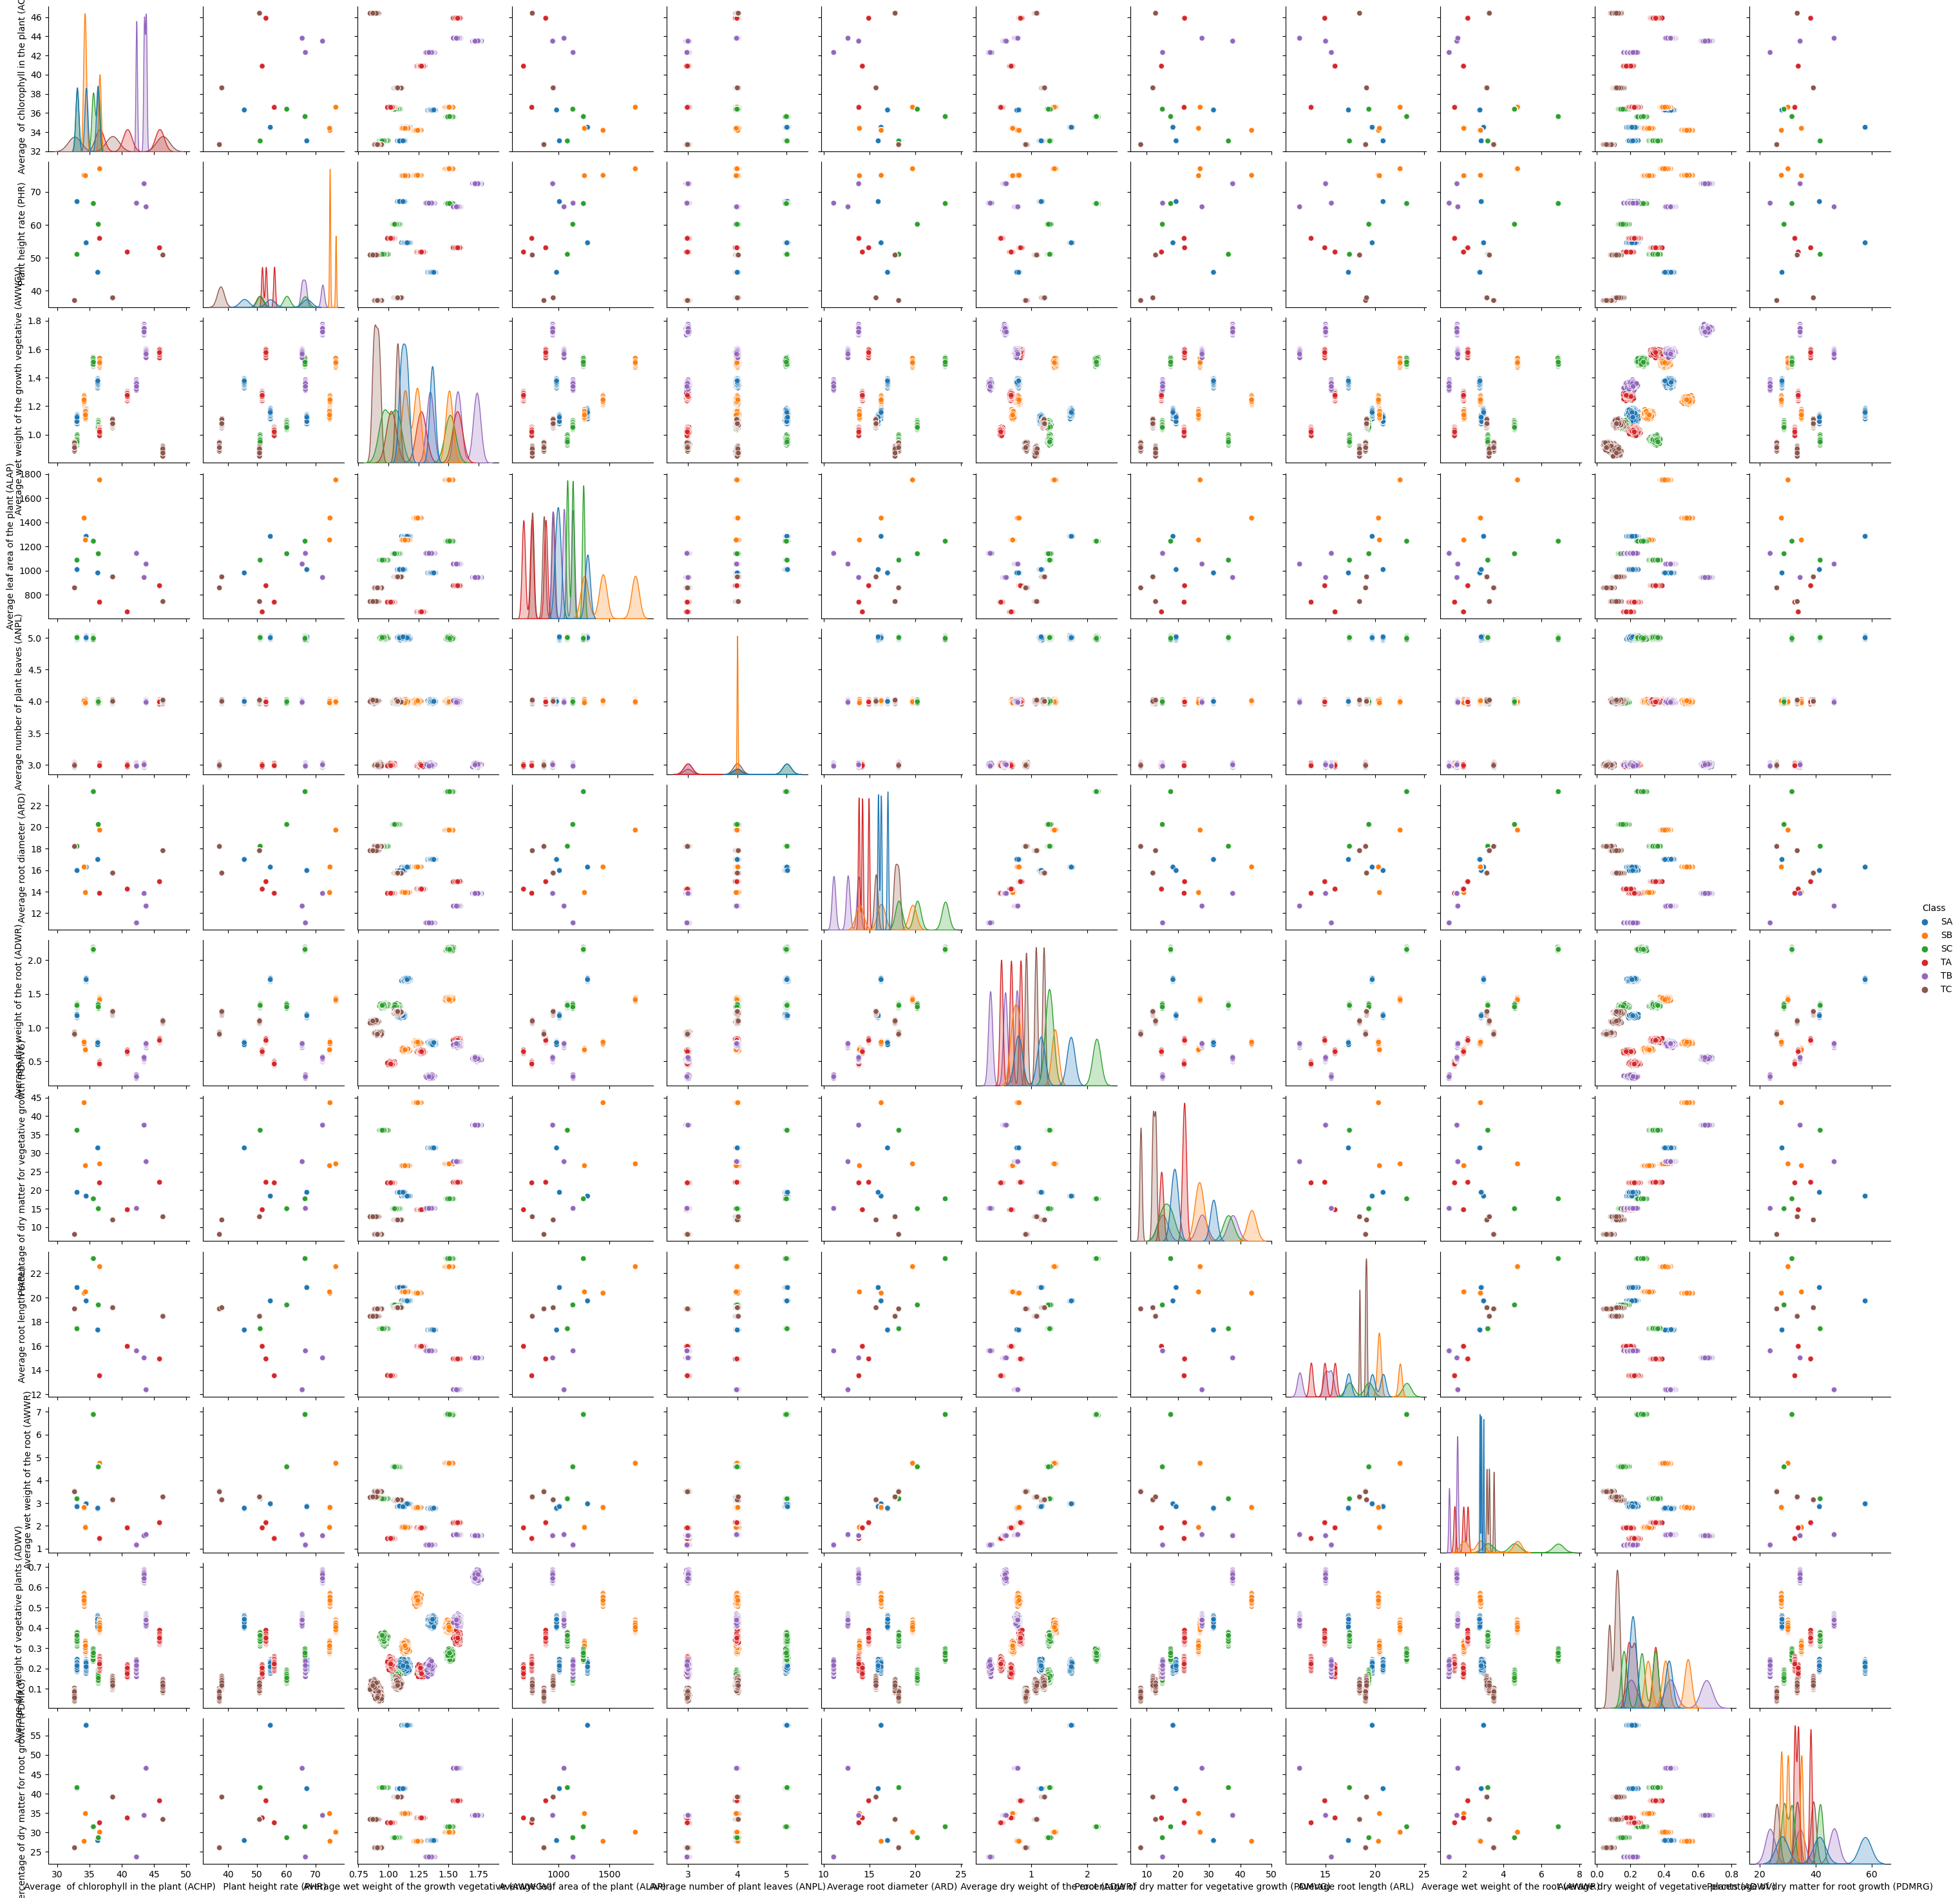

In [8]:
sns.pairplot(data, hue='Class')
plt.show()

## Encode categorical

In [9]:
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])
data['Random'] = label_encoder.fit_transform(data['Random'])

##  Correlation matrix

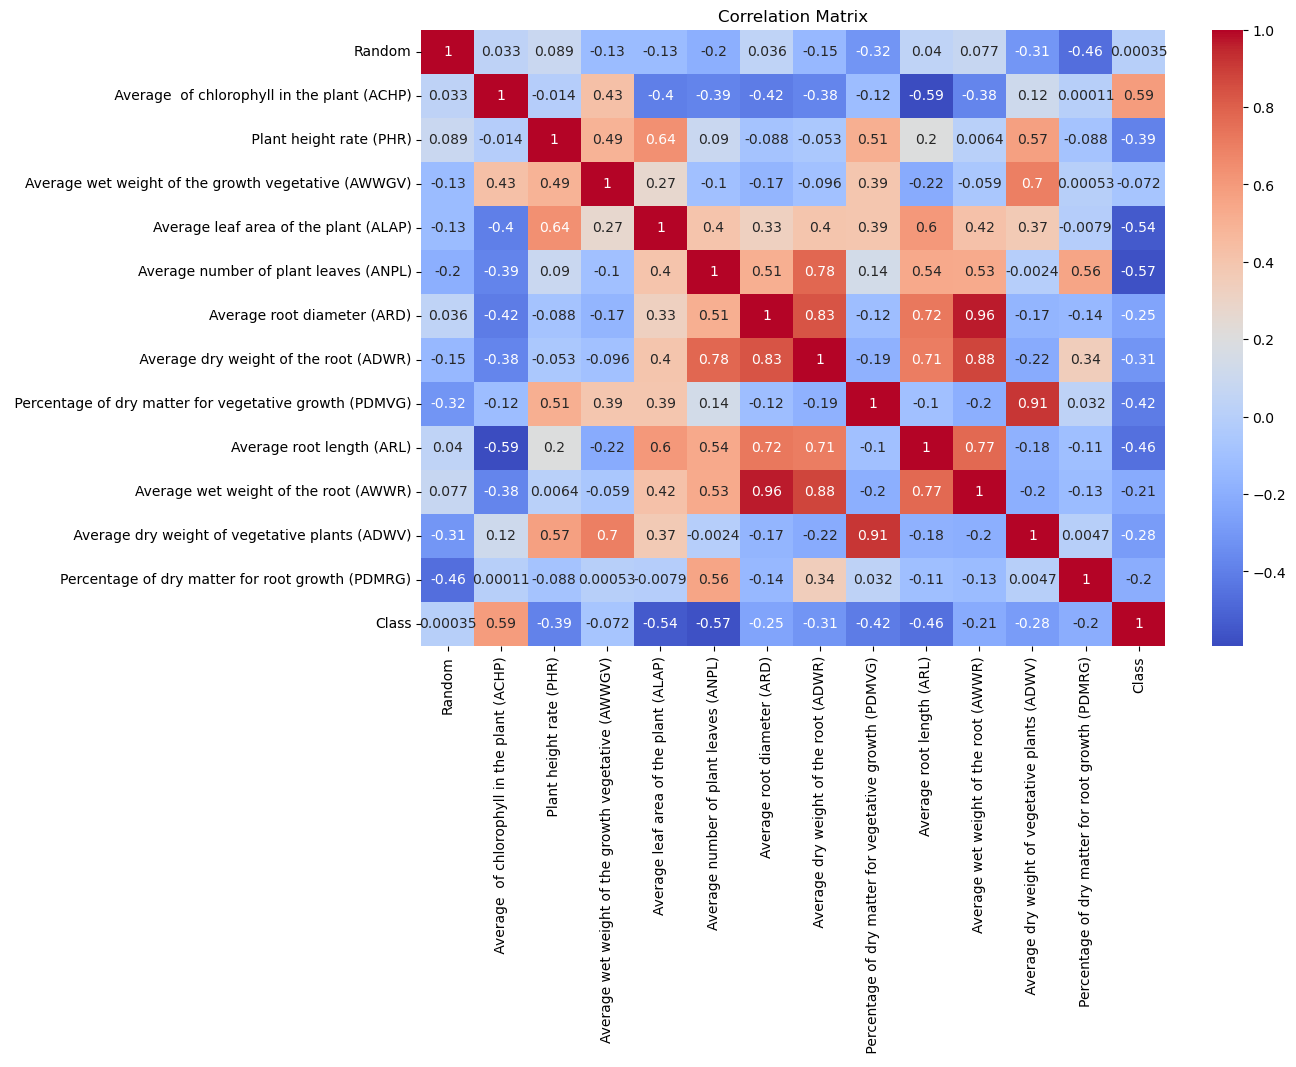

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Separate features and target variable

In [11]:
X = data.drop('Class', axis=1)
y = data['Class']

## Split the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model selection and training

In [13]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [14]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'--- {model_name} ---')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

--- Logistic Regression ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1046
           3       1.00      1.00      1.00       950
           4       1.00      1.00      1.00      1033
           5       1.00      1.00      1.00       969

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

--- Random Forest ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1046
           3       1.00      1.00      1.00       950
           4       1.00      1.00      1.00      1033
           5       1.00      1.00      1.00       969


## Model tuning with GridSearchCV

In [15]:
param_grid = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

In [16]:
best_model_name = 'RandomForest'
best_model = RandomForestClassifier()
grid_search = GridSearchCV(best_model, param_grid[best_model_name], cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 10, 'n_estimators': 100}


## Final evaluation

In [17]:
y_pred = best_model.predict(X_test)
print('Final model evaluation:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Final model evaluation:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1046
           3       1.00      1.00      1.00       950
           4       1.00      1.00      1.00      1033
           5       1.00      1.00      1.00       969

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



## Save the model

In [18]:
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']